In [1]:
using Distributions
using Plots
using Optim

traceon = Optim.Options(
    store_trace = true,
    extended_trace = true
)

# model
Distributions.TDist(μ, ρ, ν) = LocationScale(μ, ρ, TDist(ν))

# test data
X = [-0.01, 0.01, 1.0]

# estimations with different initial values
r1 = optimize(x -> -loglikelihood(TDist(x[1], 10^x[2], 10^x[3]), X), [0.3, -0.2, 0.16], traceon)
r2 = optimize(x -> -loglikelihood(TDist(x[1], 10^x[2], 10^x[3]), X), [0.3, -0.2, 0.18], traceon);

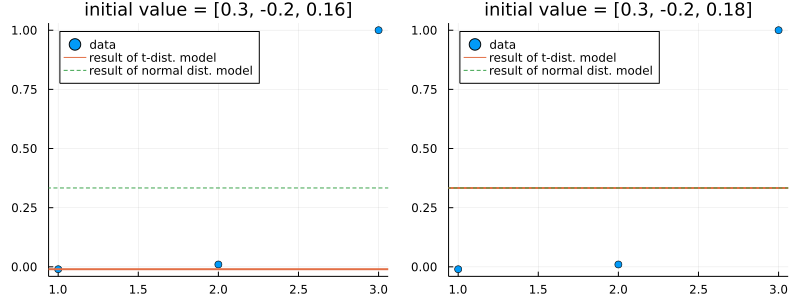

In [2]:
function plot_result(r, X) 
    x = r.initial_x
    m = r.minimizer
    normal = fit_mle(Normal, X)

    plot(; legend=:topleft)
    scatter!(axes(X,1), X; label="data")
    hline!([m[1]]; label="result of t-dist. model", lw=2)
    hline!([mean(normal)]; label="result of normal dist. model", ls=:dash)
    title!("initial value = $x"; titlefontsize=12)
end

R1 = plot_result(r1, X)
R2 = plot_result(r2, X)
plot(R1, R2; size=(800, 300))

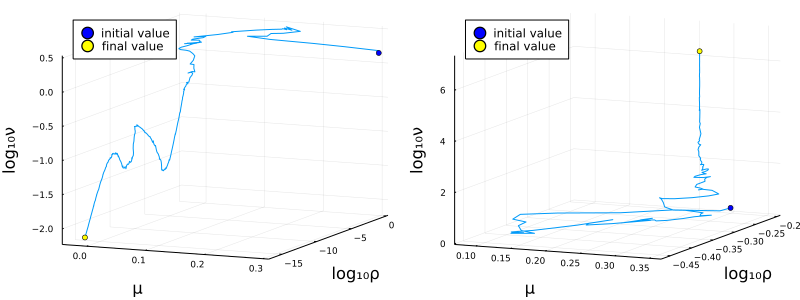

In [3]:
function plot_trace(r)
    x = r.initial_x
    c = hcat(x, (t.metadata["centroid"] for t in r.trace)...)
    m = r.minimizer

    plot(; legend=:topleft)
    plot!(c[1,:], c[2,:], c[3,:]; label="")
    scatter3d!([x[1]], [x[2]], [x[3]]; label="initial value", c=:blue, ms=3)
    scatter3d!([m[1]], [m[2]], [m[3]]; label="final value", c=:yellow, ms=3)
    plot!(; xlabel="μ", ylabel="log₁₀ρ", zlabel="log₁₀ν")
end

P1 = plot_trace(r1)
P2 = plot_trace(r2)
plot(P1, P2; size=(800, 300))
plot!(; leftmargin=3Plots.mm, bottommargin=3Plots.mm, rightmargin=3Plots.mm)
plot!(; tickfontsize=6)

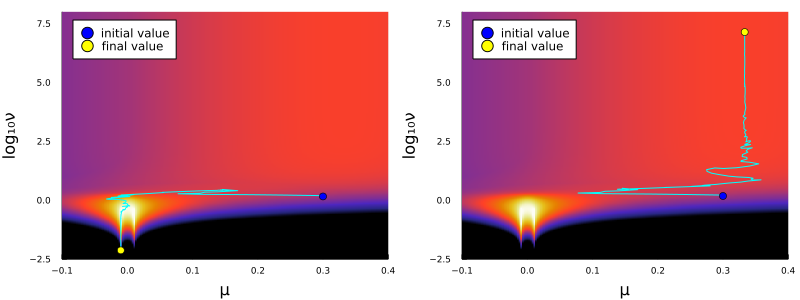

In [4]:
function f(μ, log10ν, X)
    log10rhos = range(-15, 10; length=200)
    -maximum(loglikelihood(TDist(μ, 10^log10ρ, 10^log10ν), X) for log10ρ in log10rhos)
end

function plot_trace2d(r)
    x = r.initial_x
    c = hcat(x, (t.metadata["centroid"] for t in r.trace)...)
    m = r.minimizer

    mus = range(-0.1, 0.4; length=200)
    log10nus = range(-2.5, 8.0; length=200)
    z = f.(mus', log10nus, Ref(X))

    plot(; legend=:topleft, colorbar=false)
    plot!(; xlim=extrema(mus), ylim=extrema(log10nus))
    heatmap!(mus, log10nus, z; clim=(-1, 5), c=reverse(cgrad(:CMRmap)))
    plot!(c[1,:], c[3,:]; label="", c=:cyan)
    scatter!([x[1]], [x[3]]; label="initial value", ms=4, c=:blue)
    scatter!([m[1]], [m[3]]; label="final value", ms=4, c=:yellow)
    plot!(; xlabel="μ", ylabel="log₁₀ν")
end

Q1 = plot_trace2d(r1)
Q2 = plot_trace2d(r2)
plot(Q1, Q2; size=(800, 300))
plot!(; leftmargin=3Plots.mm, bottommargin=3Plots.mm)
plot!(; tickfontsize=6)